In [15]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:/Users/Jouke/Documents/evedata-logger/output/market_groups/PLEX/market_history_PLEX_only.csv")
df['date'] = pd.to_datetime(df['date'], errors='coerce')
# Drop rows with NaT in 'date' (if any)
df = df.dropna(subset=['date'])
df = df.set_index('date')
print(type(df.index))  # Should be <class 'pandas.core.indexes.datetimes.DatetimeIndex'>

# === EVE PLEX MARKET FEES & TAXES (Edit Here) ===
BROKER_FEE_BUY = 0.005        # 0.5% broker fee on buy
BROKER_FEE_SELL = 0.005       # 0.5% broker fee on sell
SALES_TAX = 0.0337            # 3.37% sales tax on sell
TOTAL_SELL_FEE = BROKER_FEE_SELL + SALES_TAX  # 0.0387




<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Paths to your files
plex_path = r"C:\Users\Jouke\Documents\evedata-logger\output\market_groups\PLEX\market_history_PLEX_only.csv"
hypercore_path = r"C:\Users\Jouke\Documents\evedata-logger\output\market_groups\Hypercore\market_history_52568_2025-07-17_13-33_cleaned.csv"


PLEX vs Hypercore Correlations:
  Average Price: -0.7679
  Volume       : 0.1892
  Highest      : -0.7527
  Lowest       : -0.7626


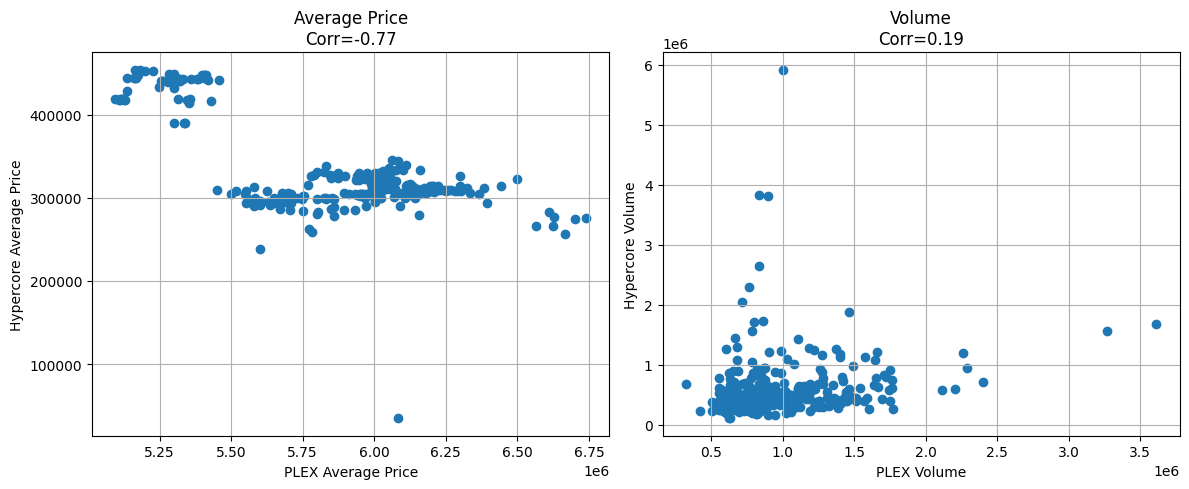

,date,average_plex,average_hypercore,volume_plex,volume_hypercore
0,2024-07-17,5300000.0,389300.0,825013,471729
1,2024-07-18,5338000.0,389500.0,690510,284740
2,2024-07-19,5337000.0,389700.0,672598,370113
3,2024-07-20,5347000.0,418000.0,869763,500767
4,2024-07-21,5315000.0,418900.0,757783,440269


In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Paths to your files
plex_path = r"C:\Users\Jouke\Documents\evedata-logger\output\market_groups\PLEX\market_history_PLEX_only.csv"
hypercore_path = r"C:\Users\Jouke\Documents\evedata-logger\output\market_groups\Hypercore\market_history_52568_2025-07-17_13-33_cleaned.csv"

# 1. Load Data
df_plex = pd.read_csv(plex_path)
df_hypercore = pd.read_csv(hypercore_path)

# 2. Merge on date
df = pd.merge(
    df_plex, df_hypercore,
    on='date',
    suffixes=('_plex', '_hypercore')
)

# 3. Pearson Correlation Tests
correlations = {
    'Average Price': df['average_plex'].corr(df['average_hypercore']),
    'Volume': df['volume_plex'].corr(df['volume_hypercore']),
    'Highest': df['highest_plex'].corr(df['highest_hypercore']),
    'Lowest': df['lowest_plex'].corr(df['lowest_hypercore']),
}

print("PLEX vs Hypercore Correlations:")
for label, corr in correlations.items():
    print(f"  {label:13s}: {corr:.4f}")

# 4. Scatter Plots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].scatter(df['average_plex'], df['average_hypercore'])
axs[0].set_xlabel('PLEX Average Price')
axs[0].set_ylabel('Hypercore Average Price')
axs[0].set_title(f'Average Price\nCorr={correlations["Average Price"]:.2f}')
axs[0].grid(True)

axs[1].scatter(df['volume_plex'], df['volume_hypercore'])
axs[1].set_xlabel('PLEX Volume')
axs[1].set_ylabel('Hypercore Volume')
axs[1].set_title(f'Volume\nCorr={correlations["Volume"]:.2f}')
axs[1].grid(True)

plt.tight_layout()
plt.show()

# 5. (Optional) Display first few rows of merged DataFrame
df[['date', 'average_plex', 'average_hypercore', 'volume_plex', 'volume_hypercore']].head()


PLEX date range:      2024-07-08 to 2025-07-07, 365 rows
Hypercore date range: 2024-07-17 to 2025-07-16, 365 rows
Merged date range:    2024-07-17 to 2025-07-07, 356 rows

First 5 rows:
          date  average_plex  average_hypercore
0  2024-07-17     5300000.0           389300.0
1  2024-07-18     5338000.0           389500.0
2  2024-07-19     5337000.0           389700.0
3  2024-07-20     5347000.0           418000.0
4  2024-07-21     5315000.0           418900.0

Last 5 rows:
            date  average_plex  average_hypercore
351  2025-07-03     6004000.0           329800.0
352  2025-07-04     5976000.0           326900.0
353  2025-07-05     5948000.0           329300.0
354  2025-07-06     6020000.0           328300.0
355  2025-07-07     5975000.0           330300.0

=== Descriptive statistics ===
       average_plex  average_hypercore   volume_plex  volume_hypercore
count  3.560000e+02         356.000000  3.560000e+02      3.560000e+02
mean   5.866169e+06      333282.584270  9.630103

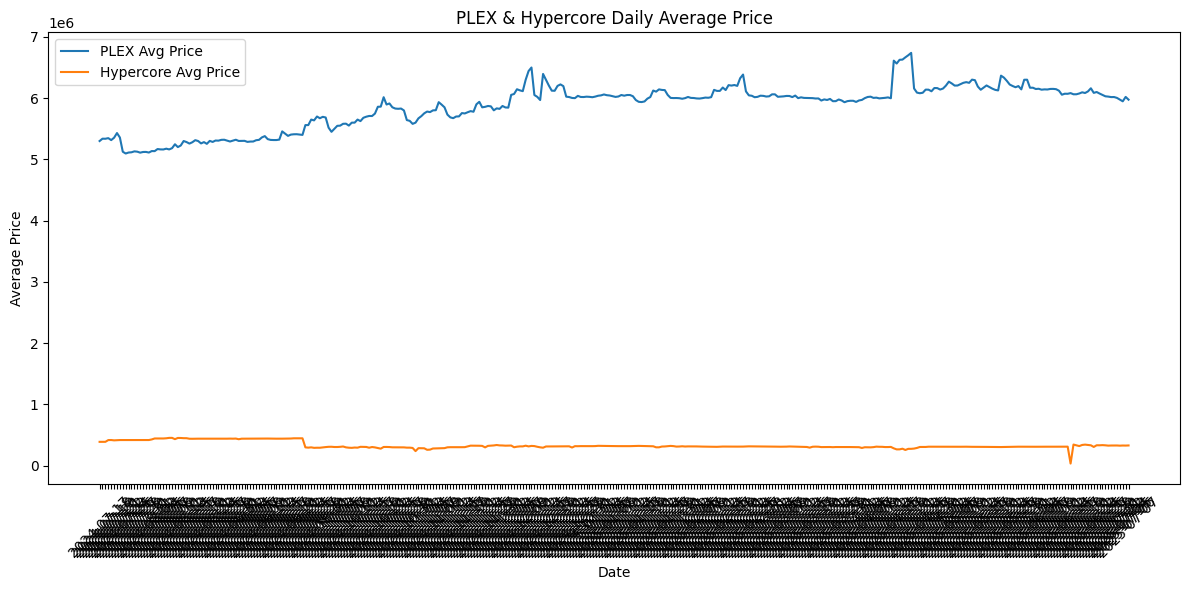

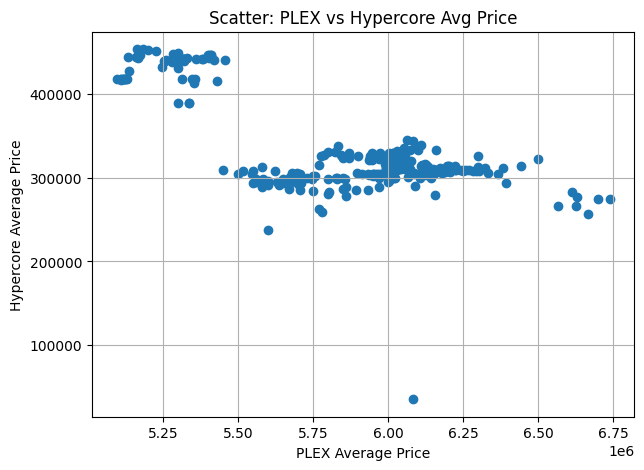


Overall price correlation: -0.7679
Early period correlation:  -0.7785
Late period correlation:   -0.2712
Lagged correlation (PLEX lagged by 1): -0.7613

If all checks look good and patterns are smooth, your negative correlation is robust!


In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# File paths
plex_path = r"C:\Users\Jouke\Documents\evedata-logger\output\market_groups\PLEX\market_history_PLEX_only.csv"
hypercore_path = r"C:\Users\Jouke\Documents\evedata-logger\output\market_groups\Hypercore\market_history_52568_2025-07-17_13-33_cleaned.csv"

# Load
df_plex = pd.read_csv(plex_path)
df_hypercore = pd.read_csv(hypercore_path)

# Merge on date
df = pd.merge(
    df_plex, df_hypercore,
    on='date',
    suffixes=('_plex', '_hypercore')
)

# Sanity check: Date ranges and missing data
print(f"PLEX date range:      {df_plex['date'].min()} to {df_plex['date'].max()}, {len(df_plex)} rows")
print(f"Hypercore date range: {df_hypercore['date'].min()} to {df_hypercore['date'].max()}, {len(df_hypercore)} rows")
print(f"Merged date range:    {df['date'].min()} to {df['date'].max()}, {len(df)} rows\n")

print("First 5 rows:\n", df[['date', 'average_plex', 'average_hypercore']].head())
print("\nLast 5 rows:\n", df[['date', 'average_plex', 'average_hypercore']].tail())

# Descriptive statistics
print("\n=== Descriptive statistics ===")
print(df[['average_plex', 'average_hypercore', 'volume_plex', 'volume_hypercore']].describe())

# Plot the price series
plt.figure(figsize=(12,6))
plt.plot(df['date'], df['average_plex'], label='PLEX Avg Price')
plt.plot(df['date'], df['average_hypercore'], label='Hypercore Avg Price')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.title('PLEX & Hypercore Daily Average Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Scatter plot
plt.figure(figsize=(7,5))
plt.scatter(df['average_plex'], df['average_hypercore'])
plt.xlabel('PLEX Average Price')
plt.ylabel('Hypercore Average Price')
plt.title('Scatter: PLEX vs Hypercore Avg Price')
plt.grid(True)
plt.show()

# Overall correlation
overall_corr = df['average_plex'].corr(df['average_hypercore'])
print(f"\nOverall price correlation: {overall_corr:.4f}")

# Correlation for first half and second half
mid = len(df)//2
early_corr = df['average_plex'][:mid].corr(df['average_hypercore'][:mid])
late_corr  = df['average_plex'][mid:].corr(df['average_hypercore'][mid:])
print(f"Early period correlation:  {early_corr:.4f}")
print(f"Late period correlation:   {late_corr:.4f}")

# Lagged correlation (PLEX price one day earlier)
lag_corr = df['average_plex'].shift(1).corr(df['average_hypercore'])
print(f"Lagged correlation (PLEX lagged by 1): {lag_corr:.4f}")

print("\nIf all checks look good and patterns are smooth, your negative correlation is robust!")


Total merged days: 356
         date  average_plex  average_hypercore
0  2024-07-17     5300000.0           389300.0
1  2024-07-18     5338000.0           389500.0
2  2024-07-19     5337000.0           389700.0
           date  average_plex  average_hypercore
353  2025-07-05     5948000.0           329300.0
354  2025-07-06     6020000.0           328300.0
355  2025-07-07     5975000.0           330300.0

=== FULL PERIOD ===
Average Price                  Pearson: -0.7679 | Spearman: -0.3706 | Kendall: -0.2387

=== SPLIT PERIODS ===
Early period                   Pearson: -0.7785 | Spearman: -0.6021 | Kendall: -0.3578
Late period                    Pearson: -0.2712 | Spearman: -0.1858 | Kendall: -0.1438

=== LAGGED CORRELATIONS (PLEX leads) ===
PLEX lag +1d                   Pearson: -0.7613 | Spearman: -0.3523 | Kendall: -0.2215
PLEX lag +2d                   Pearson: -0.7537 | Spearman: -0.3346 | Kendall: -0.2090
PLEX lag +7d                   Pearson: -0.7175 | Spearman: -0.2733 | Ke

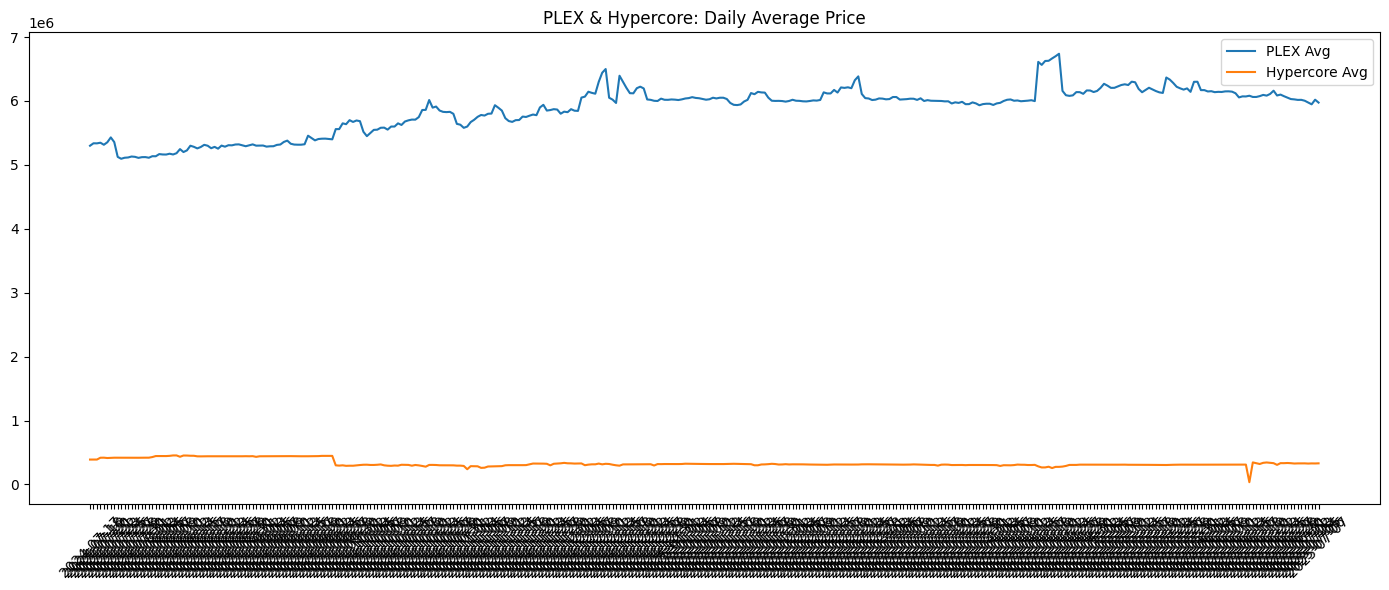

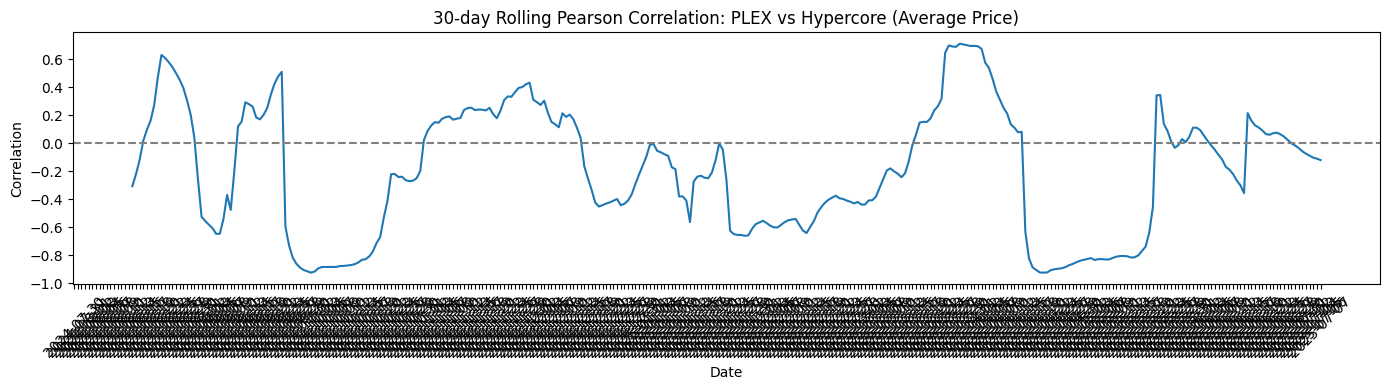


=== Sample merged data ===


,date,average_plex,average_hypercore,volume_plex,volume_hypercore
0,2024-07-17,5300000.0,389300.0,825013,471729
1,2024-07-18,5338000.0,389500.0,690510,284740
2,2024-07-19,5337000.0,389700.0,672598,370113
3,2024-07-20,5347000.0,418000.0,869763,500767
4,2024-07-21,5315000.0,418900.0,757783,440269
5,2024-07-22,5354000.0,413500.0,684186,553231
6,2024-07-23,5430000.0,416400.0,698271,223799
7,2024-07-24,5357000.0,418500.0,836814,211593
8,2024-07-25,5125000.0,418300.0,1311496,550346
9,2024-07-26,5096000.0,418200.0,1181868,431428


In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Use your local paths:
plex_path = r"C:\Users\Jouke\Documents\evedata-logger\output\market_groups\PLEX\market_history_PLEX_only.csv"
hypercore_path = r"C:\Users\Jouke\Documents\evedata-logger\output\market_groups\Hypercore\market_history_52568_2025-07-17_13-33_cleaned.csv"

# 1. Load Data
df_plex = pd.read_csv(plex_path)
df_hypercore = pd.read_csv(hypercore_path)

# 2. Merge on date and sort
df = pd.merge(
    df_plex, df_hypercore,
    on='date',
    suffixes=('_plex', '_hypercore')
).sort_values('date').reset_index(drop=True)

print(f"Total merged days: {len(df)}")
print(df[['date', 'average_plex', 'average_hypercore']].head(3))
print(df[['date', 'average_plex', 'average_hypercore']].tail(3))

# 3. Define correlation summary function
def correlation_summary(x, y, label=''):
    pearson = x.corr(y)
    spearman = x.corr(y, method='spearman')
    kendall = x.corr(y, method='kendall')
    print(f"{label:30s} Pearson: {pearson:.4f} | Spearman: {spearman:.4f} | Kendall: {kendall:.4f}")
    return pearson, spearman, kendall

print('\n=== FULL PERIOD ===')
correlation_summary(df['average_plex'], df['average_hypercore'], 'Average Price')

print('\n=== SPLIT PERIODS ===')
mid = len(df)//2
correlation_summary(df['average_plex'][:mid], df['average_hypercore'][:mid], 'Early period')
correlation_summary(df['average_plex'][mid:], df['average_hypercore'][mid:], 'Late period')

print('\n=== LAGGED CORRELATIONS (PLEX leads) ===')
for lag in [1,2,7]:
    correlation_summary(df['average_plex'].shift(lag), df['average_hypercore'], f'PLEX lag +{lag}d')
print('\n=== LAGGED CORRELATIONS (Hypercore leads) ===')
for lag in [1,2,7]:
    correlation_summary(df['average_plex'], df['average_hypercore'].shift(lag), f'PLEX lag -{lag}d')

# Rolling correlation
window = 30
rolling_corr = df['average_plex'].rolling(window).corr(df['average_hypercore'])

plt.figure(figsize=(14,6))
plt.plot(df['date'], df['average_plex'], label='PLEX Avg')
plt.plot(df['date'], df['average_hypercore'], label='Hypercore Avg')
plt.legend()
plt.title('PLEX & Hypercore: Daily Average Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14,4))
plt.plot(df['date'], rolling_corr)
plt.axhline(0, color='grey', ls='--')
plt.title(f'30-day Rolling Pearson Correlation: PLEX vs Hypercore (Average Price)')
plt.ylabel('Correlation')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\n=== Sample merged data ===")
display(df[['date','average_plex','average_hypercore','volume_plex','volume_hypercore']].head(10))


In [37]:
import pandas as pd

# Paths to your files (adjust as needed)
plex_path = '/mnt/data/market_history_PLEX_only.csv'
hypercore_path = '/mnt/data/market_history_52568_2025-07-17_13-33_cleaned.csv'
ship_path = '/mnt/data/market_history_Battleship_2025-07-14_18-58.csv'

# Load CSVs
df_plex = pd.read_csv(plex_path)
df_hypercore = pd.read_csv(hypercore_path)
df_ship = pd.read_csv(ship_path)

# Merge all on date
df = df_plex.merge(df_hypercore, on='date', suffixes=('_plex', '_hypercore'))
df = df.merge(df_ship[['date', 'average']], on='date')  # only take ship's average column
df.rename(columns={'average': 'average_ship'}, inplace=True)

# Drop NaN rows to avoid calculation errors
df = df.dropna().reset_index(drop=True)

# Calculate correlations
print("Correlation: Ship vs PLEX")
print("  Pearson :", df['average_ship'].corr(df['average_plex']))
print("  Spearman:", df['average_ship'].corr(df['average_plex'], method='spearman'))
print("  Kendall :", df['average_ship'].corr(df['average_plex'], method='kendall'))

print("\nCorrelation: Ship vs Hypercore")
print("  Pearson :", df['average_ship'].corr(df['average_hypercore']))
print("  Spearman:", df['average_ship'].corr(df['average_hypercore'], method='spearman'))
print("  Kendall :", df['average_ship'].corr(df['average_hypercore'], method='kendall'))

print("\nSample merged data:")
display(df[['date','average_ship','average_plex','average_hypercore']].head())


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/market_history_PLEX_only.csv'